In [1]:
import os
import numpy as np
from scipy.optimize import nnls
from pbwrap.utils import open_image

# Load example image

In [2]:
PATH = "/home/floric/Documents/fish_images/"
images_filenames = os.listdir(PATH)
images_filenames


['Col P0 SPX1 probe Root FISH Im4.czi',
 'Quantif_centrosome',
 'signal.tif',
 'AF_eraser',
 'Col P0 SPX1 probe Root FISH Im7.czi',
 'af.tif',
 'Col P0 SPX1 probe Root FISH Im6.czi',
 'Col P0 SPX1 probe Root FISH Im5.czi',
 'transfer_10932528_files_12e3cdbe.tar']

In [3]:
signal_filename = 'Col P0 SPX1 probe Root FISH Im6.czi'

In [4]:
signal_image = open_image(PATH + signal_filename).squeeze()
signal_image.shape

(3, 39, 512, 512)

In [5]:
images = [chan for chan in signal_image]

# API testing

In [6]:
from NMF import remove_autofluorescence_NMF
from NMF import (
    _estimate_target_matrix,
    _apply_gaussian_filter_on_target_matrix,
    _acess_convergence,
    _compute_error,
    _extract_resulting_signals,
    _estimate_coef_and_darkcurrent,
    _initialize_matrix,
    
)

In [7]:
signal, af, residuals = remove_autofluorescence_NMF(
    images= images,
    exposure_time = 100,
    gaussian_kernel = 5,
    max_iteration=50
)

shape :  (39, 512, 512)
decomposed_signal_matrix, shape :  (2, 10223616)
iter :  0


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  1


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  2


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  3


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  4


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  5


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  6


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  7


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  8


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  9


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  10


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  11


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  12


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  13


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  14


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  15


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  16


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  17


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  18


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  19


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  20


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  21


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  22


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  23


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  24


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  25


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  26


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  27


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  28


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  29


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  30


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  31


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  32


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  33


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  34


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  35


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  36


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  37


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  38


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  39


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  40


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  41


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  42


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  43


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  44


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  45


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  46


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  47


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  48


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


decomposed_signal_matrix, shape :  (2, 10223616)
iter :  49


B and D estimate: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


shape :  (39, 512, 512)
decomposed_signal_matrix, shape :  (2, 10223616)


# Output results

In [8]:
import bigfish.stack as stack
stack.save_image(signal, PATH + "/signal.tif")
stack.save_image(af, PATH + "/af.tif")

# Napari results

In [9]:
%gui qt
import napari

In [10]:
Viewer = napari.Viewer()
Viewer.add_image(signal)

<Image layer 'signal' at 0x79bf0e59dbe0>

# Residual plot

In [11]:
import matplotlib.pyplot as plt

In [12]:
residuals.keys()

dict_keys(['decomposed_signal_matrix', 'dark_current_matrix', 'linear_coef_matrix'])

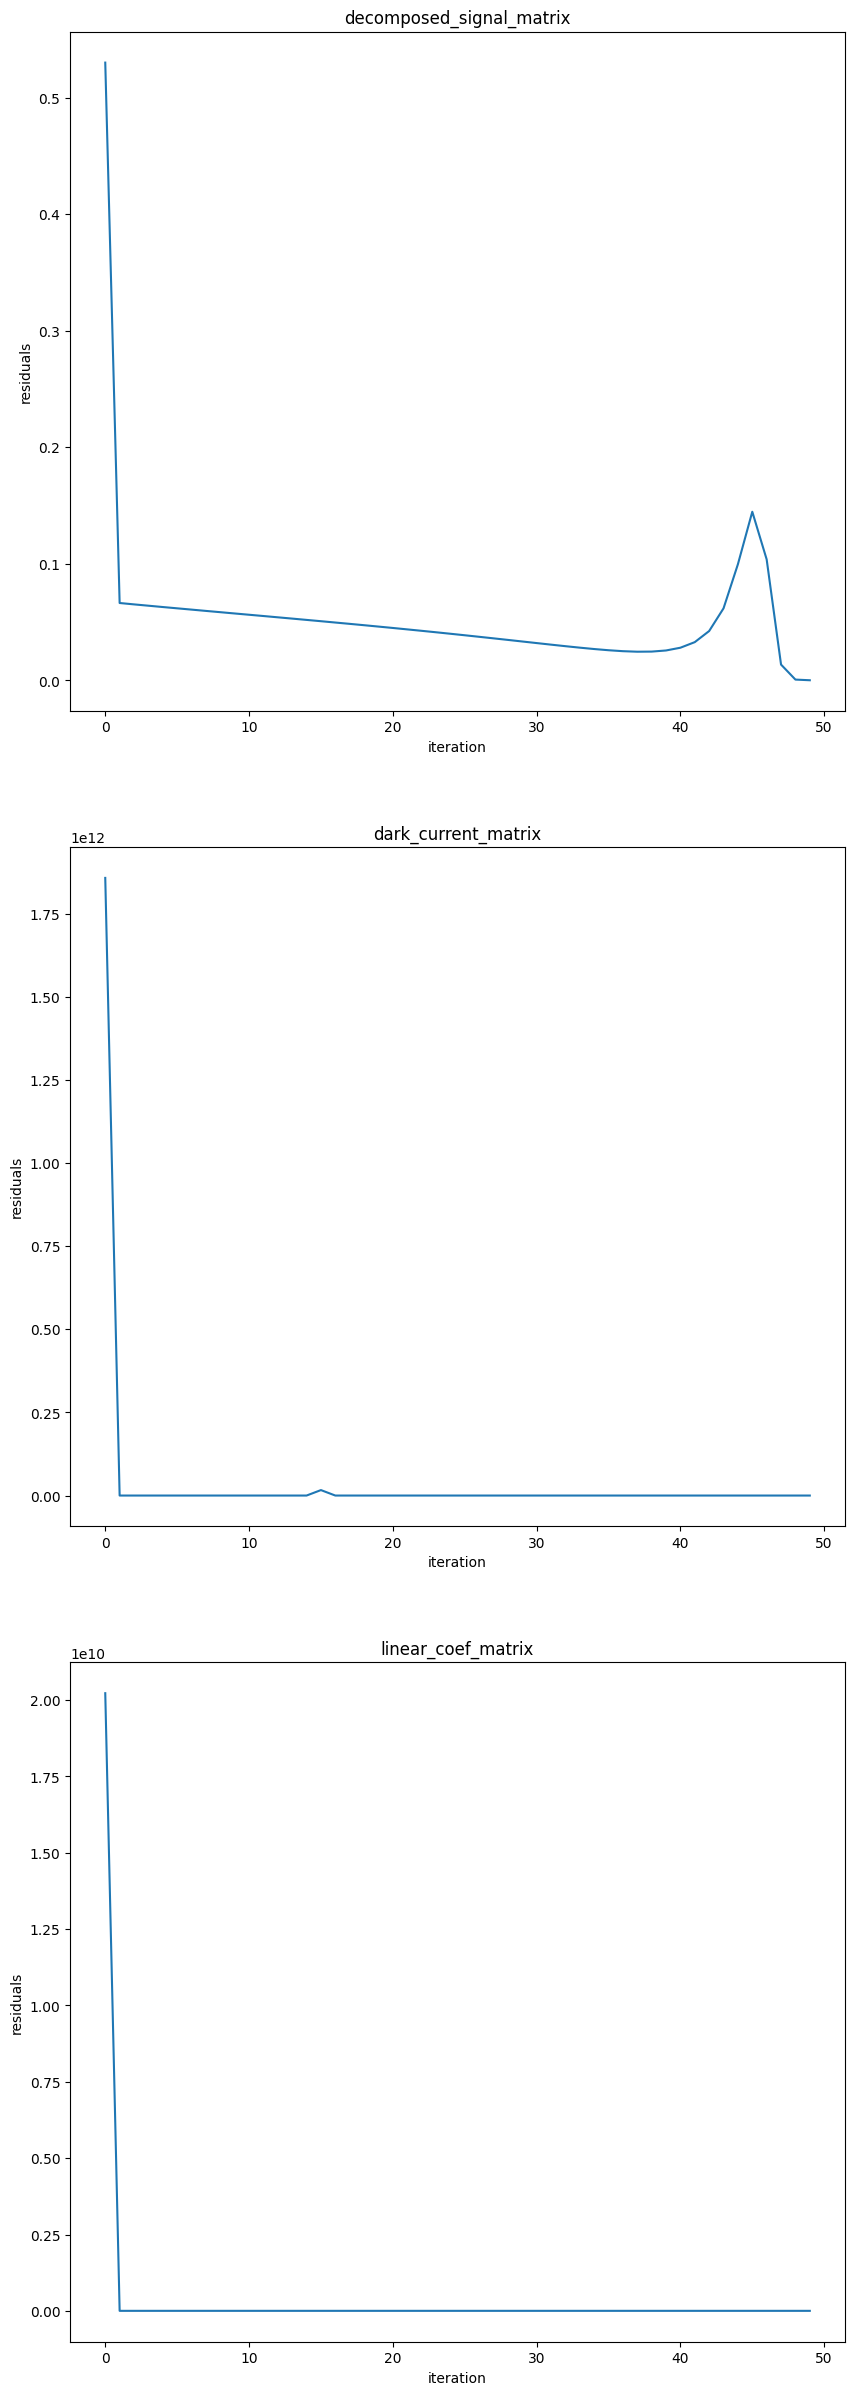

In [13]:
fig = plt.figure(figsize=(10,30))
a = fig.subplots(3,1)

for key, ax in zip(residuals.keys(), a) :
    data = residuals[key]
    ax.plot(
        np.arange(len(data)),
        data
    )
    
    ax.set_title(key)
    ax.set_xlabel("iteration")
    ax.set_ylabel("residuals")